## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
26,23-03-2020,23-03-2020 00:00,2060,1007,238,737,5,42,11,9,...,1080.0,980.0,9,5,8,0,1,0,0,0
27,24-03-2020,24-03-2020 00:00,2362,1130,293,852,6,46,12,12,...,1234.0,1128.0,14,6,12,0,1,0,0,0
28,25-03-2020,25-03-2020 00:00,2995,1517,365,992,12,62,17,16,...,1586.0,1409.0,20,10,12,0,1,0,0,0
29,26-03-2020,26-03-2020 00:00,3544,1858,435,1082,20,89,24,15,...,1899.0,1645.0,28,13,18,0,1,0,0,0
30,27-03-2020,27-03-2020 00:00,4268,2443,520,1110,30,99,24,21,...,2288.0,1976.0,33,18,24,0,1,0,0,0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 56 columns):
data                                 31 non-null object
data_dados                           31 non-null object
confirmados                          31 non-null int64
confirmados_arsnorte                 31 non-null int64
confirmados_arscentro                31 non-null int64
confirmados_arslvt                   31 non-null int64
confirmados_arsalentejo              31 non-null int64
confirmados_arsalgarve               31 non-null int64
confirmados_acores                   31 non-null int64
confirmados_madeira                  31 non-null int64
confirmados_estrangeiro              16 non-null float64
confirmados_novos                    31 non-null int64
recuperados                          31 non-null int64
obitos                               31 non-null int64
internados                           23 non-null float64
internados_uci                       14 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,16.00000,31.000000,...,9.000000,9.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.0,31.0,31.0
mean,714.935484,366.387097,82.483871,234.645161,2.806452,17.483871,3.451613,2.838710,9.12500,137.677419,...,1161.444444,1050.777778,3.677419,2.032258,2.806452,0.0,0.258065,0.0,0.0,0.0
std,1160.693929,619.505646,141.835085,354.787312,6.600098,26.239755,6.810965,5.698519,5.86373,204.694144,...,652.734270,538.131438,8.510335,4.331927,5.895871,0.0,0.444803,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,390.000000,395.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,7.500000,4.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,5.00000,2.000000,...,649.000000,631.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,78.000000,44.000000,5.000000,23.000000,0.000000,5.000000,0.000000,0.000000,9.00000,19.000000,...,1080.000000,980.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,902.500000,443.500000,96.000000,319.500000,2.000000,27.000000,3.000000,1.000000,11.00000,214.500000,...,1586.000000,1409.000000,0.500000,1.500000,2.000000,0.0,0.500000,0.0,0.0,0.0
max,4268.000000,2443.000000,520.000000,1110.000000,30.000000,99.000000,24.000000,21.000000,21.00000,724.000000,...,2288.000000,1976.000000,33.000000,18.000000,24.000000,0.0,1.000000,0.0,0.0,0.0


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


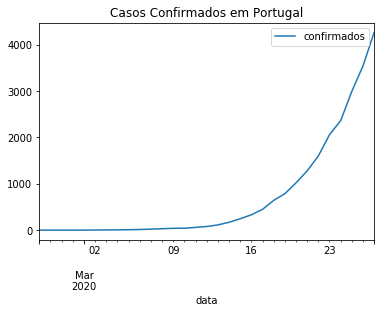

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

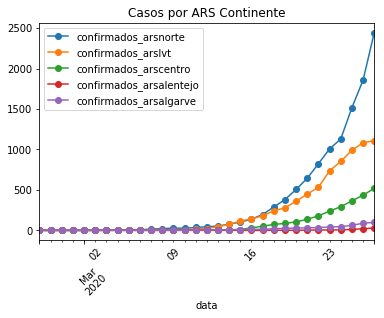

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

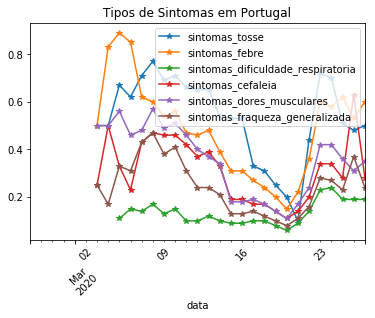

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

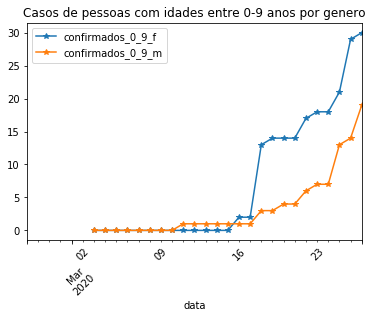

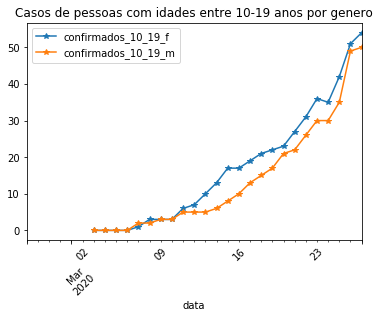

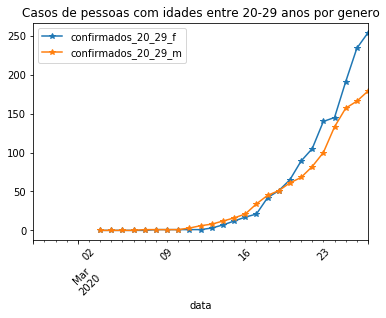

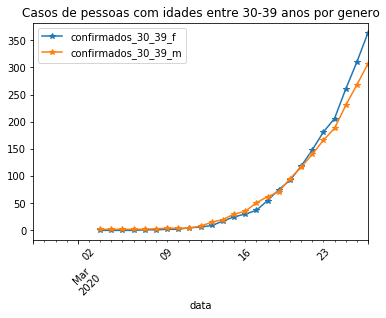

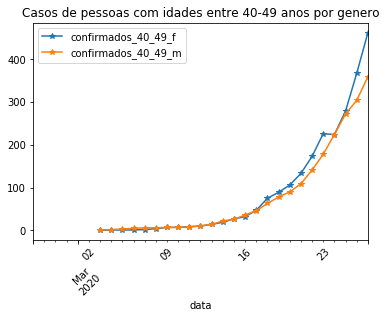

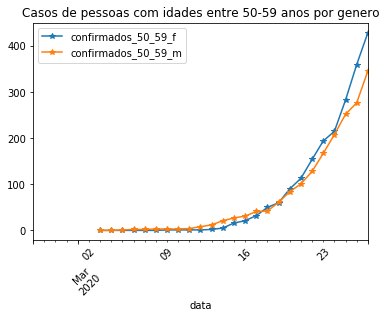

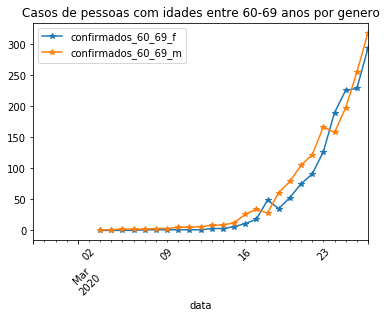

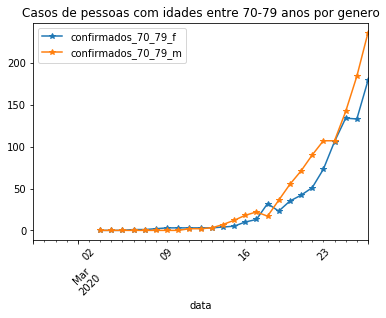

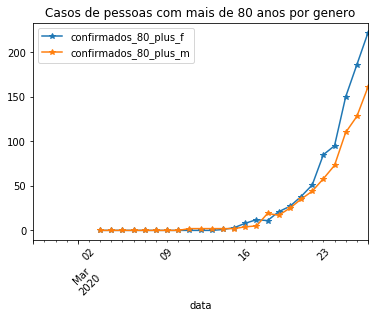

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


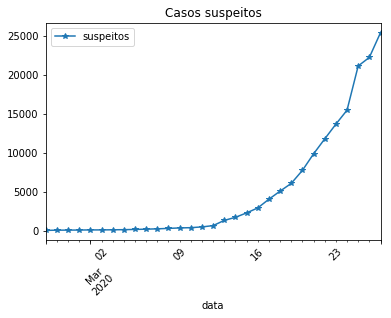

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

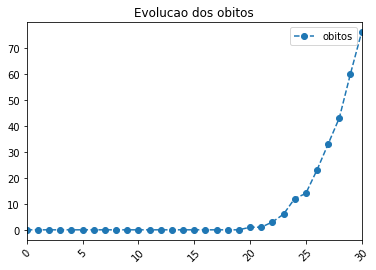

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995, 3544, 4268])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060 2362 2995 3544 4268]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:25]), x[:25])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           3.45e-24
Time:                        23:10:35   Log-Likelihood:                 1.5219
No. Observations:                  25   AIC:                            0.9562
Df Residuals:                      23   BIC:                             3.394
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3225      0.092     14.349      0.000       1.132       1.513
x1             0.3042      0.007     46.201      0.000       0.291       0.318
==============================================================================
Omnibus:                        6.481   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.723
Skew:                          -1.031   Prob(JB):                       0.0943
Kurtosis:                       3.535   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

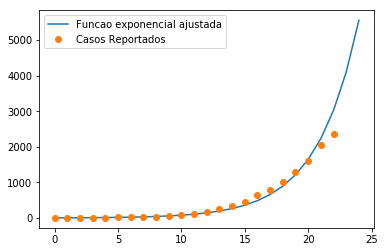

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:25])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:23], "o", label="Casos Reportados")
plt.legend()
plt.show()